In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
### We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data######

In [2]:
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Cutlets.csv to Cutlets.csv


In [6]:
data = pd.read_csv("Cutlets.csv")

In [7]:
data.head()

Unit A  Unit B
0  6.8090  6.7703
1  6.4376  7.5093
2  6.9157  6.7300
3  7.3012  6.7878
4  7.4488  7.1522

In [8]:
data.head(10)

Unit A  Unit B
0  6.8090  6.7703
1  6.4376  7.5093
2  6.9157  6.7300
3  7.3012  6.7878
4  7.4488  7.1522
5  7.3871  6.8110
6  6.8755  7.2212
7  7.0621  6.6606
8  6.6840  7.2402
9  6.8236  7.0503

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [10]:
data.describe()

Unit A     Unit B
count  35.000000  35.000000
mean    7.019091   6.964297
std     0.288408   0.343401
min     6.437600   6.038000
25%     6.831500   6.753600
50%     6.943800   6.939900
75%     7.280550   7.195000
max     7.516900   7.545900

In [11]:
## Null values##
data.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [25]:
##Duplicate Values##
data[data.duplicated()].shape

(0, 2)

In [24]:
data[data.duplicated()]

Empty DataFrame
Columns: [Unit A, Unit B]
Index: []

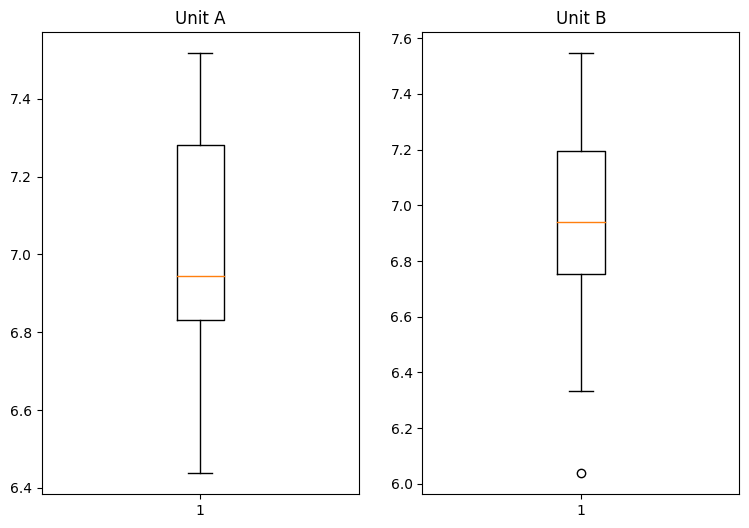

In [26]:
### Plotting Data
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(data['Unit B'])
plt.title('Unit B')
plt.show()

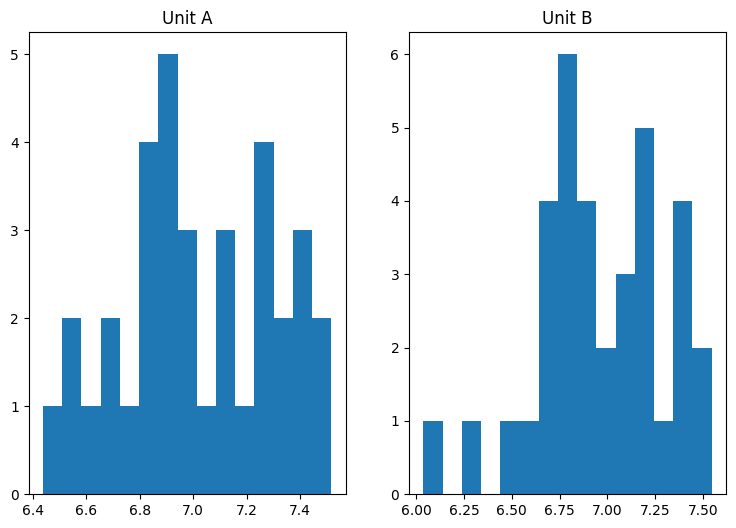

In [34]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(data['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(data['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

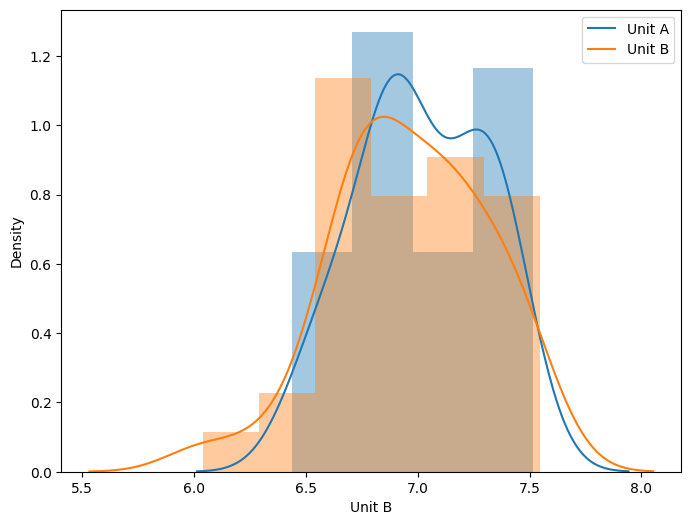

In [35]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(data['Unit A'], kde = True)
sns.distplot(data['Unit B'],hist = True)
plt.legend(labels)

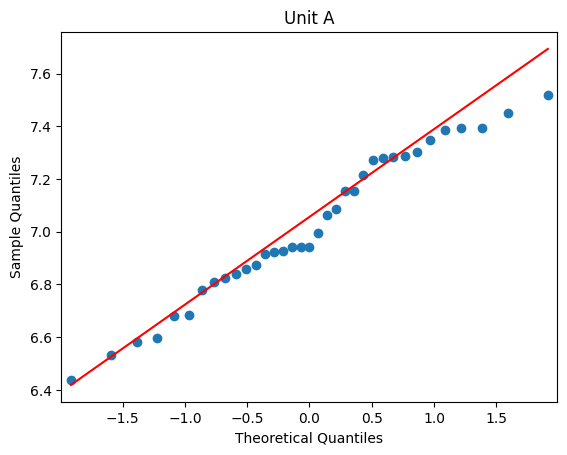

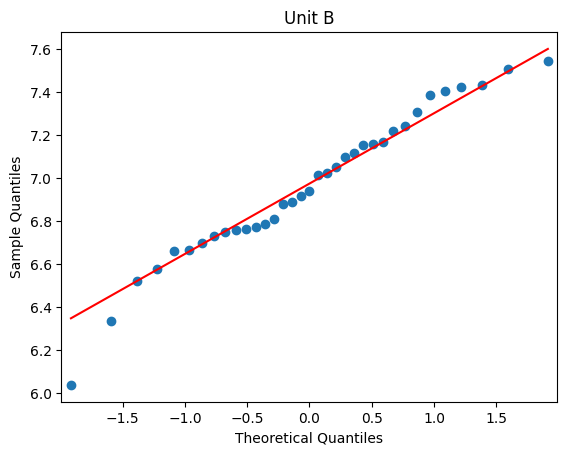

In [40]:
sm.qqplot(data["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(data["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [44]:
###Compare Evidences with Hypothesis using t-statistics###
statistic , p_value = stats.ttest_ind(data['Unit A'],data['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


In [45]:
## interpreting p-value##
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis
